In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTEN
import time
import dataframe_image as dfi
import matplotlib.pyplot as plt

In [3]:
# wczytanie zbioru
df = pd.read_csv('clean_dataset.csv')

In [4]:
df

,Unnamed: 0,basket_icon_click,basket_add_list,basket_add_detail,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,sign_in,saw_checkout,saw_homepage,ordered
0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
455396,455396,0,0,0,0,0,0,0,0,1,0
455397,455397,0,0,0,0,0,0,0,0,0,0
455398,455398,0,0,0,0,0,0,0,0,1,0
455399,455399,0,0,0,0,0,0,0,0,0,0


In [5]:
# podział na zmienne
X = df.drop(['Unnamed: 0', 'ordered'], axis=1)
y = df['ordered']

In [6]:
# podział zbioru na zbiór treningowy i testowy + stratify
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [7]:
# oversampling przy użyciu metody SMOTE
smote = SMOTEN (random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [8]:
#sprawdzenie zbalansowania
y_train_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: ordered, dtype: float64

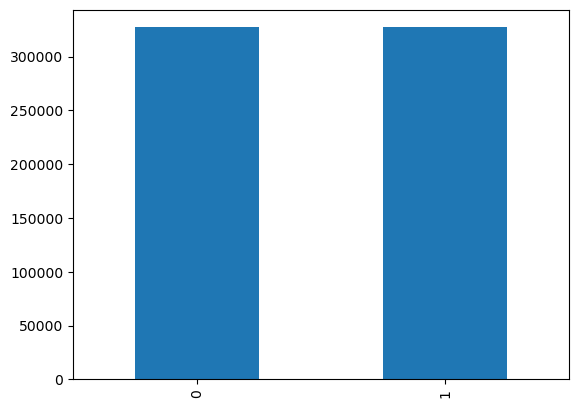

In [9]:
# przedstawienie zbalansowania na wykresie
pd.Series(y_train_smote).value_counts().plot.bar();

In [10]:
# trenowanie modelu z pomiarem czasu
start = time.time()
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)
end = time.time()
print("Czas treningu modelu Regresji Logistycznej: ", end - start)

Czas treningu modelu Regresji Logistycznej:  1.2864136695861816


In [11]:
# predykcja na danych treningowych i testowych
pred_train = model.predict(X_train_smote)
pred_test = model.predict(X_test)

pred_train_proba = model.predict_proba(X_train_smote)[:,1]
pred_test_proba = model.predict_proba(X_test)[:,1]

In [12]:
# Raporty klasyfikacji dla danych treningowych i testowych
print("Raport klasyfikacji dla danych treningowych: ") 
print(classification_report(y_train_smote, pred_train))
print('\n')
print("Raport klasyfikacji dla danych testowych: ") 
print(classification_report(y_test, pred_test))

Raport klasyfikacji dla danych treningowych: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    327230
           1       0.99      0.99      0.99    327230

    accuracy                           0.99    654460
   macro avg       0.99      0.99      0.99    654460
weighted avg       0.99      0.99      0.99    654460



Raport klasyfikacji dla danych testowych: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    109078
           1       0.86      0.99      0.92      4773

    accuracy                           0.99    113851
   macro avg       0.93      0.99      0.96    113851
weighted avg       0.99      0.99      0.99    113851



Confusion matrix dla treningu: 


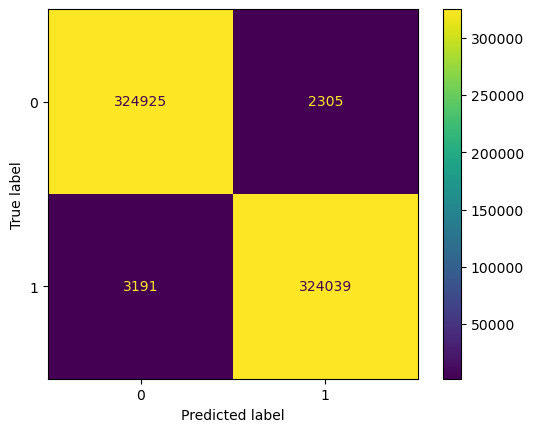

In [16]:
# Confusion matrix dla danych treningowych i testowych
print("Confusion matrix dla treningu: ") 
cm_train = confusion_matrix(y_train_smote, pred_train)
cm_display1 = ConfusionMatrixDisplay(cm_train).plot()

Confusion matrix dla testu: 


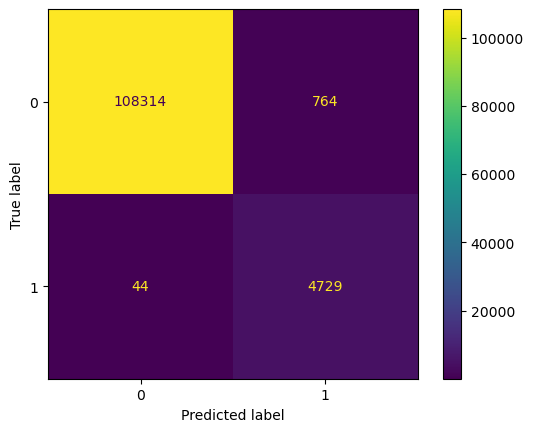

In [17]:
print("Confusion matrix dla testu: ") 
cm_test = confusion_matrix(y_test, pred_test)
cm_display2 = ConfusionMatrixDisplay(cm_test).plot()
plt.savefig('cm_regresja_logistyczna.png')

Krzywa roc dla treningu: 


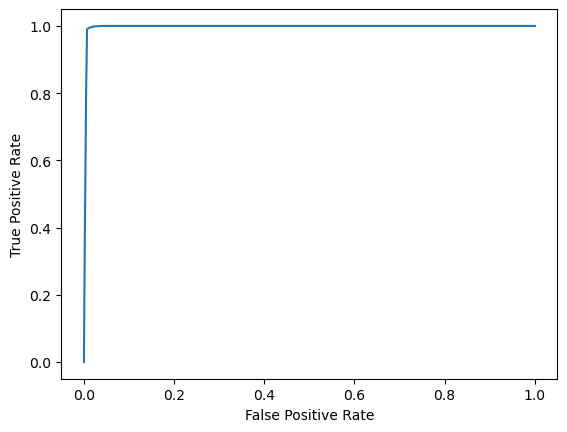

In [19]:
# Krzywa roc dla danych treningowych i testowych
print("Krzywa roc dla treningu: ")
fpr_train, tpr_train, _ = roc_curve(y_train_smote, pred_train_proba)
roc_display1 = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train).plot()

Krzywa roc dla testu: 


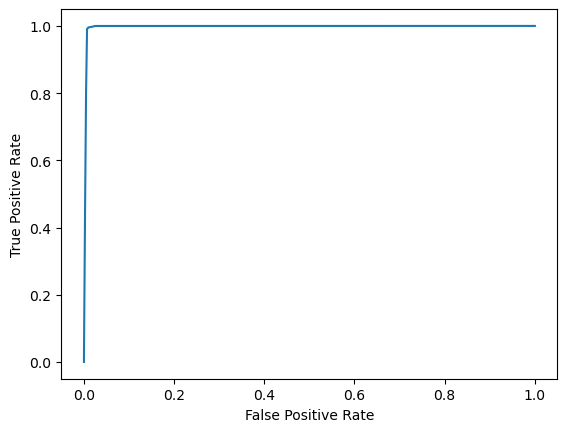

In [20]:
print("Krzywa roc dla testu: ")
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test_proba)
roc_display2 = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [21]:
# Wyniki dla predykcji na danych testowych
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, pred_test))
print("Precision:", metrics.precision_score(y_test, pred_test))
print("Recall:", metrics.recall_score(y_test, pred_test))

Accuracy: 0.9929030048045252
Precision: 0.8609138904059712
Recall: 0.9907814791535722
